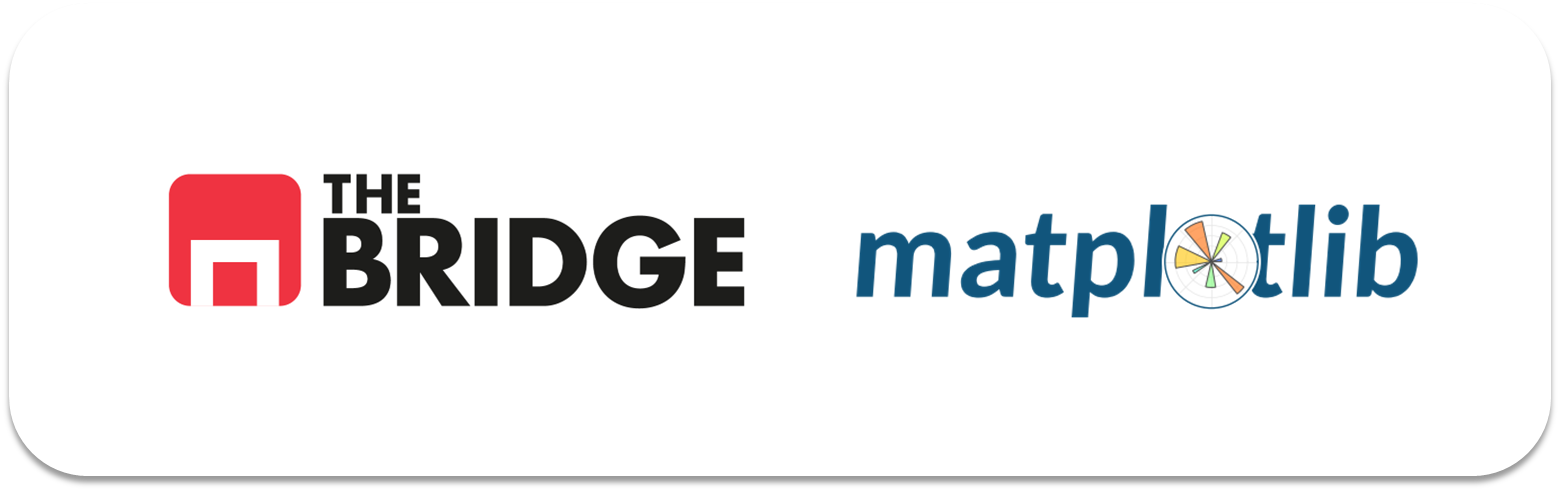

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [105]:
import pandas as pd

# Cargar el dataset
ruta = "./data/california_cities.csv"
datos = pd.read_csv(ruta)

print("Contenido del dataset:")
print(datos.head())

print("\nDescripción del dataset:")
print(datos.describe())

# Eliminar filas con valores nulos
datos_limpios = datos.dropna()

# Mostrar el nuevo contenido después de eliminar nulos
print("\nContenido del dataset limpio:")
print(datos_limpios.head())


Contenido del dataset:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

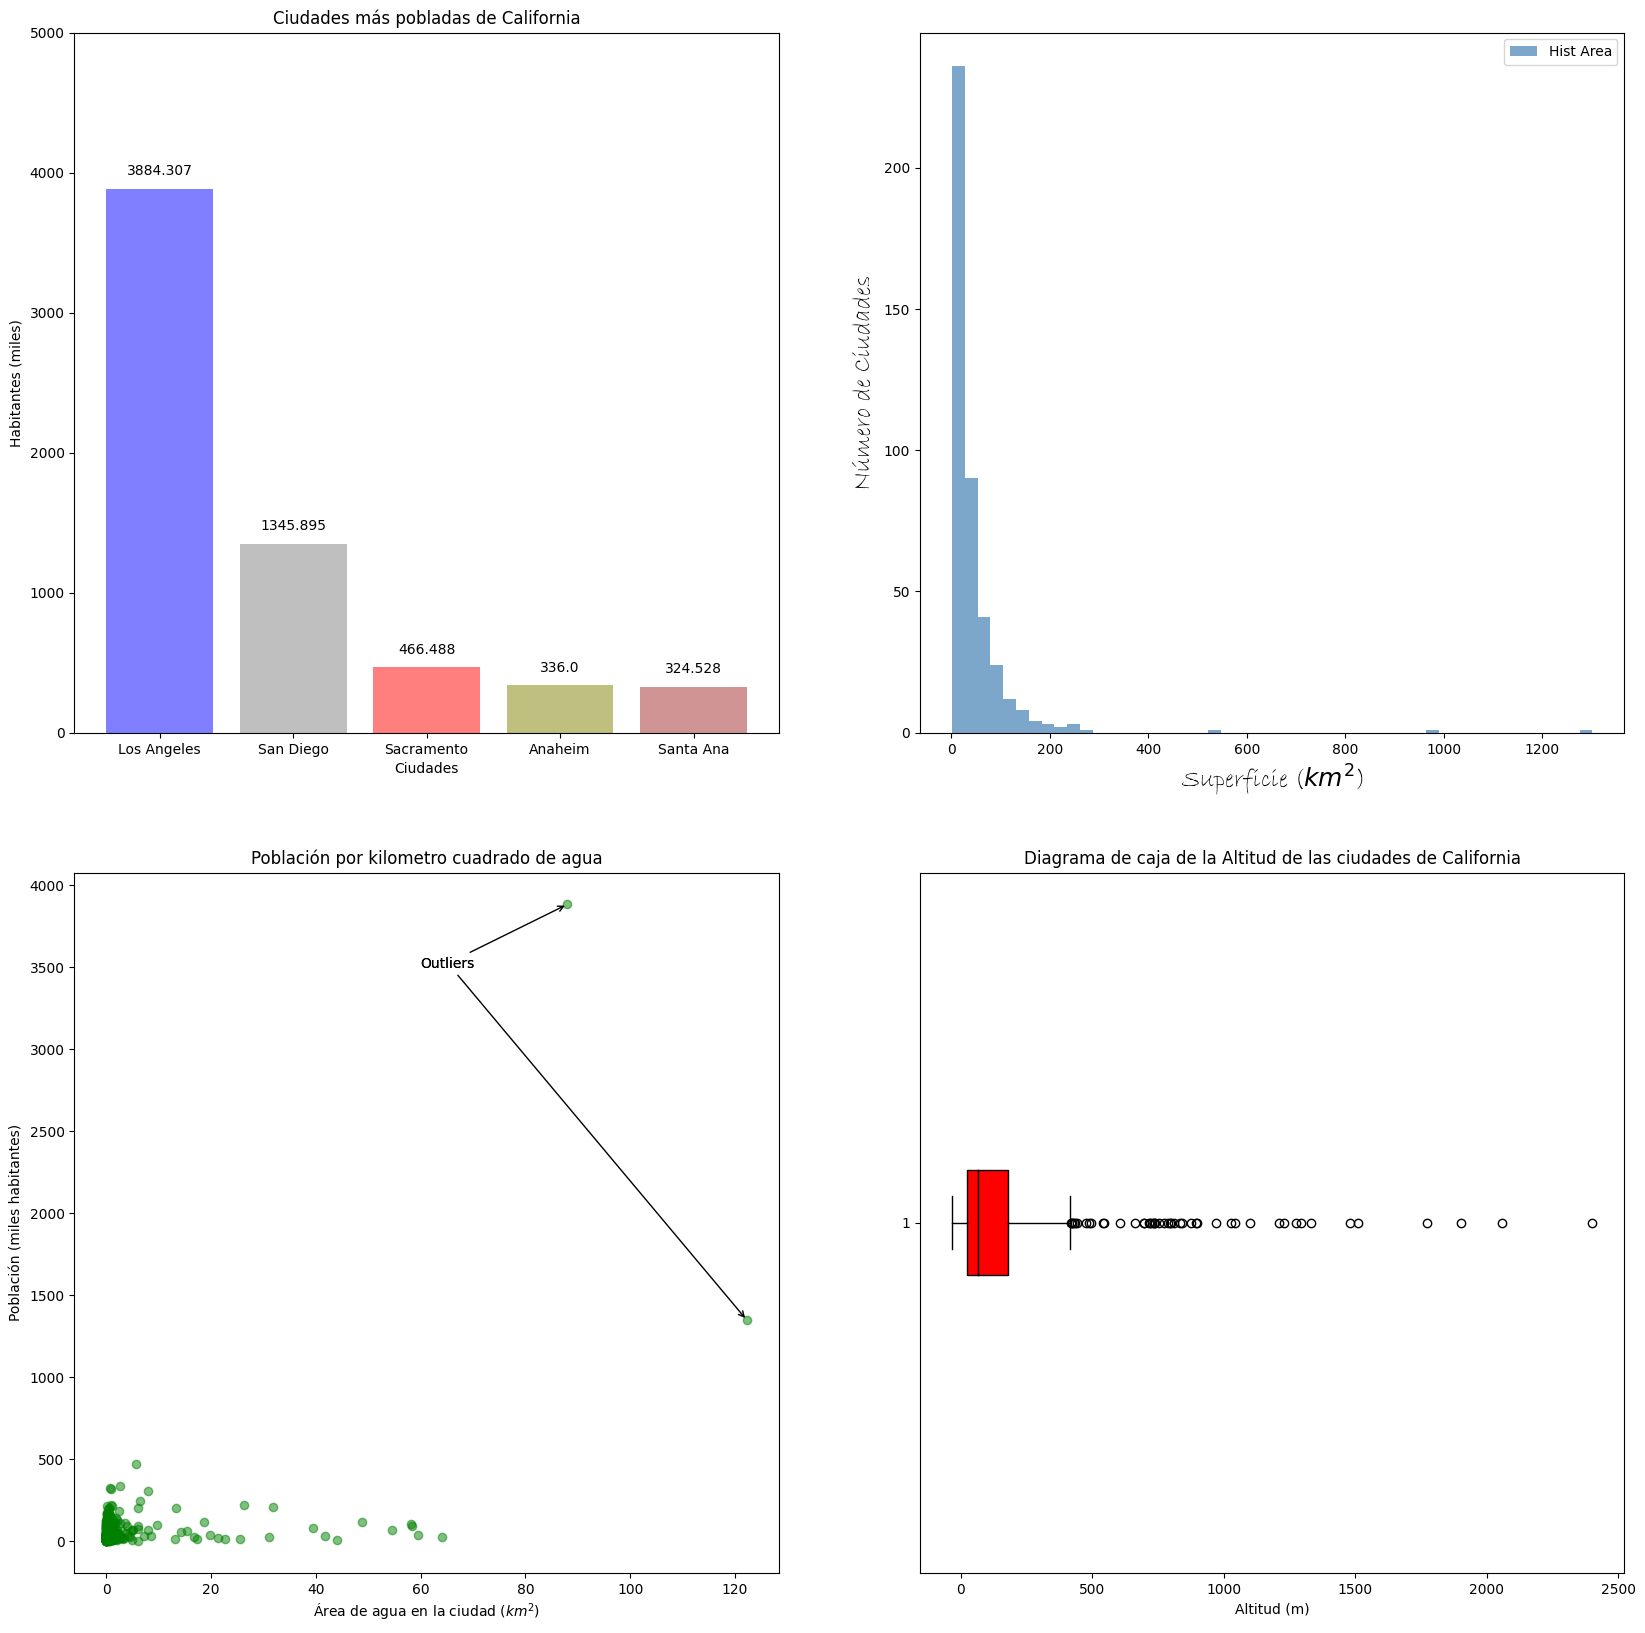

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

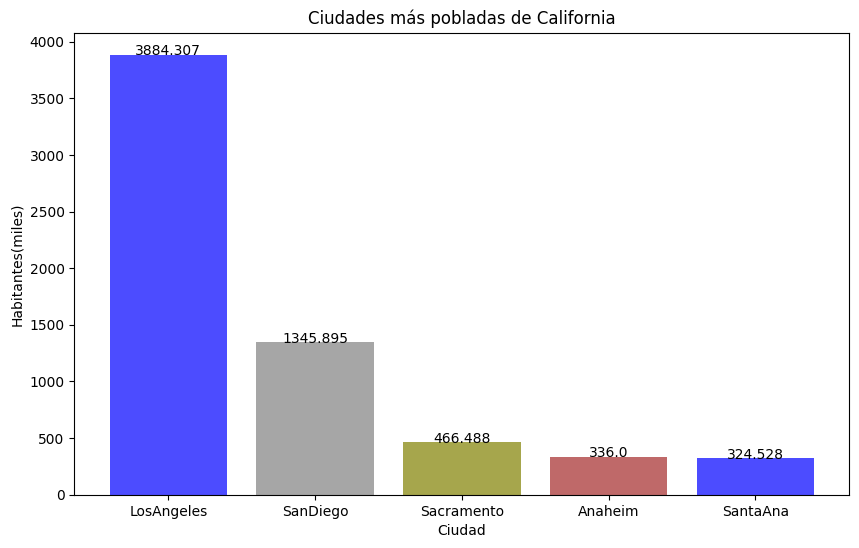

In [106]:
# Seleccionar las ciudades más pobladas
top_cities = datos_limpios.nlargest(5, 'population_total')[['city', 'population_total']]
top_cities['population_total'] = top_cities['population_total'] / 1000
# Graficar
plt.figure(figsize=(10, 6))
colors = ['blue', 'grey', 'olive', 'brown']
bars = plt.bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)

# Añadir texto
for bar, population in zip(bars, top_cities['population_total']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, population, ha='center', color='black')

plt.xlabel('Ciudad')
plt.ylabel('Habitantes(miles)')
plt.title('Ciudades más pobladas de California')
plt.show()



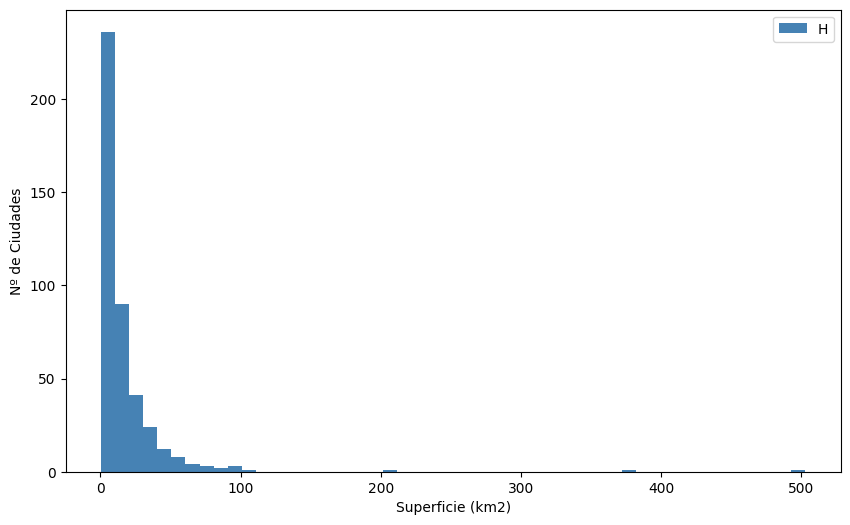

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(datos_limpios['area_total_sq_mi'], bins=50, color='steelblue')
plt.xlabel('Superficie (km2)')
plt.ylabel('Nº de Ciudades')
plt.legend('Hist area')
plt.show()



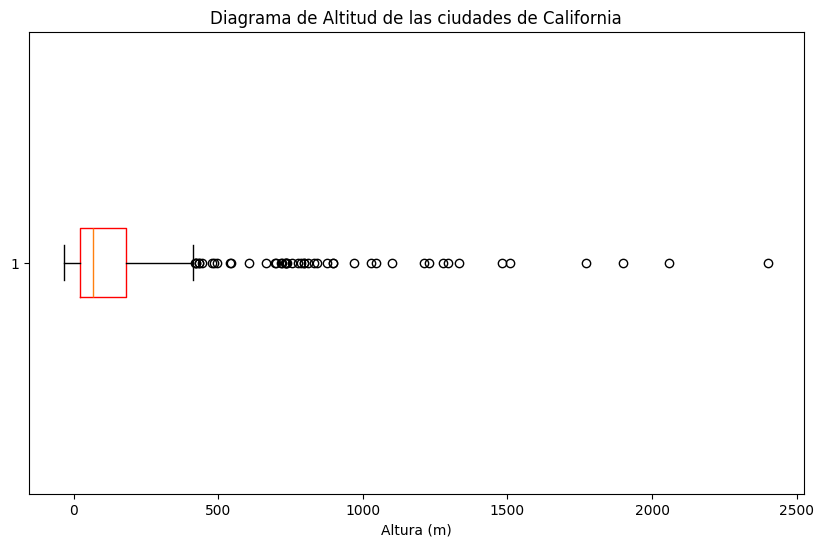

In [108]:

plt.figure(figsize=(10, 6))
boxprops = dict(color='red')  
plt.boxplot(datos_limpios['elevation_m'].dropna(), vert=False, boxprops=boxprops)
plt.xlabel('Altura (m)')
plt.title('Diagrama de Altitud de las ciudades de California')
plt.show()



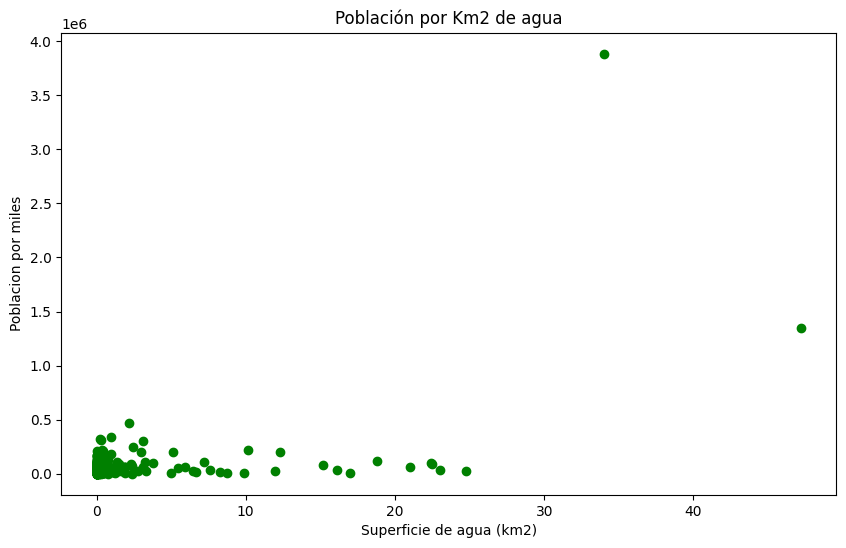

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(datos_limpios['area_water_sq_mi'], datos_limpios['population_total'], color='green')
plt.xlabel('Superficie de agua (km2)')
plt.ylabel('Poblacion por miles')
plt.title('Población por Km2 de agua')
plt.show()


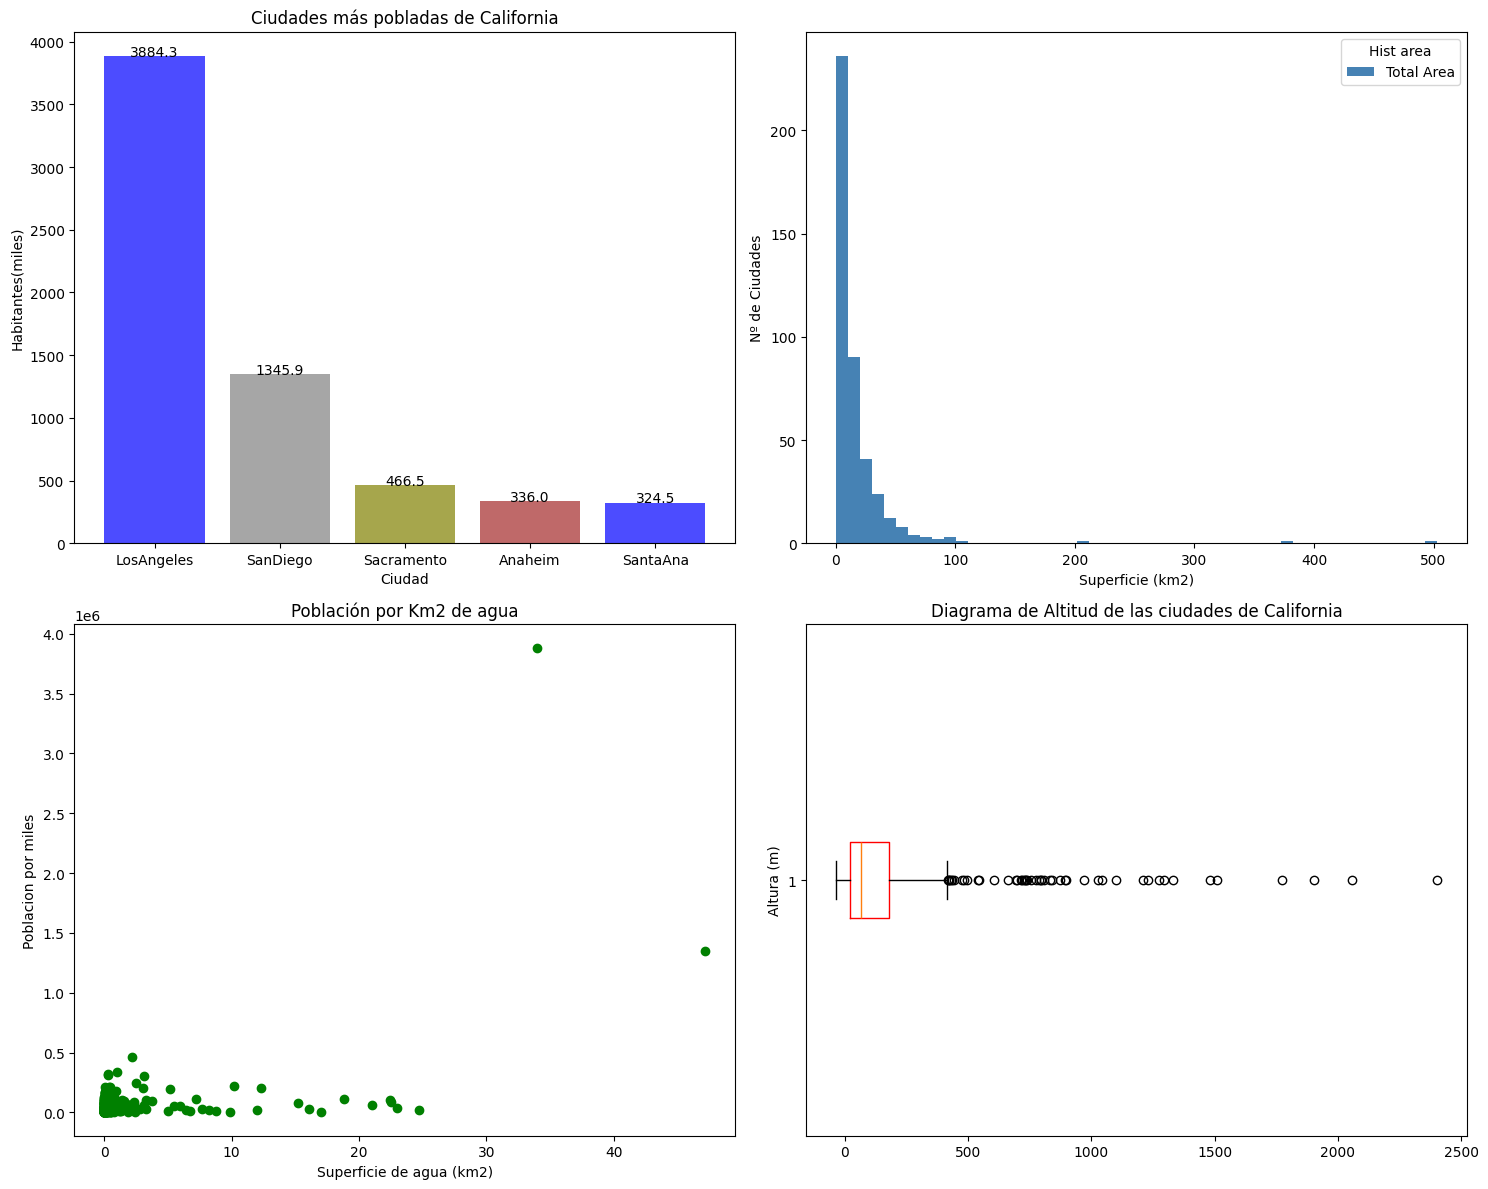

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico de las ciudades más pobladas

colors = ['blue', 'grey', 'olive', 'brown']
bars = axs[0, 0].bar(top_cities['city'], top_cities['population_total'], color=colors, alpha=0.7)
for bar, population in zip(bars, top_cities['population_total']):
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{population:.1f}', ha='center', color='black')
axs[0, 0].set_xlabel('Ciudad')
axs[0, 0].set_ylabel('Habitantes(miles)')
axs[0, 0].set_title('Ciudades más pobladas de California')


# Histograma del área total ocupada por las ciudades
axs[0, 1].hist(datos_limpios['area_total_sq_mi'], bins=50, color='steelblue', label='Total Area')
axs[0, 1].set_xlabel('Superficie (km2)')
axs[0, 1].set_ylabel('Nº de Ciudades')
axs[0, 1].legend(title='Hist area')  


# Scatter plot del área de agua con la población
axs[1, 0].scatter(datos_limpios['area_water_sq_mi'], datos_limpios['population_total'], color='green')
axs[1, 0].set_xlabel('Superficie de agua (km2)')
axs[1, 0].set_ylabel('Poblacion por miles')
axs[1, 0].set_title('Población por Km2 de agua')


# Boxplot de la altura de las ciudades
boxprops = dict(color='red')  
axs[1, 1].boxplot(datos_limpios['elevation_m'].dropna(), vert=False, boxprops=boxprops)
axs[1, 1].set_ylabel('Altura (m)')
axs[1, 1].set_title('Diagrama de Altitud de las ciudades de California')

plt.tight_layout()
plt.show()




